In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
static_data_filename = "recorded_sensor_data/imu_drift_test/being_static_for_6_mins.csv"
reader = csv.reader(open(static_data_filename, 'r'))

next(reader) # skip header
static_data = []
for row in reader:
    static_data.append([float(x) for x in row])
static_data = np.array(static_data)

In [3]:
dynamic_data_filename = "recorded_sensor_data/imu_drift_test/dynamic_test_01.csv"
reader = csv.reader(open(dynamic_data_filename, 'r'))

next(reader) # skip header
dynamic_data = []
for row in reader:
    dynamic_data.append([float(x) for x in row])
dynamic_data = np.array(dynamic_data)

## Visualization for static data

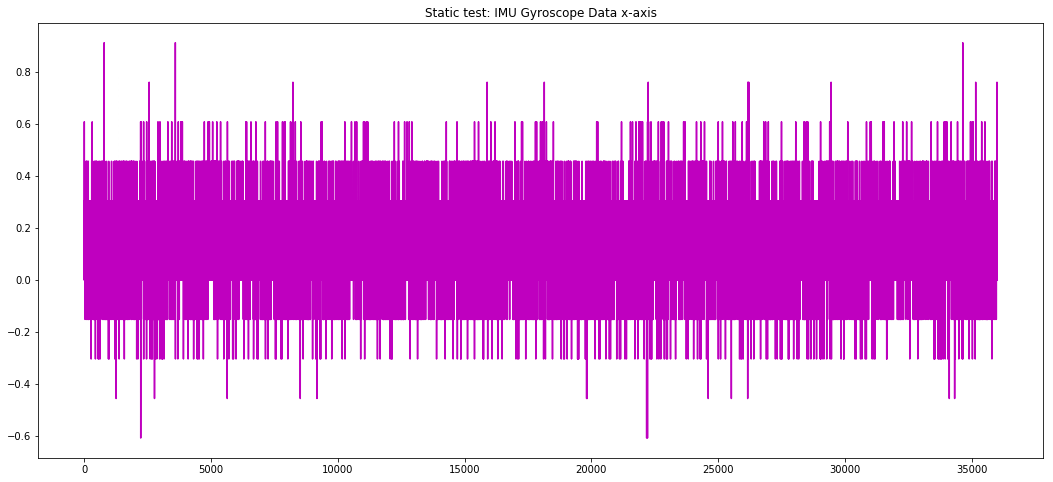

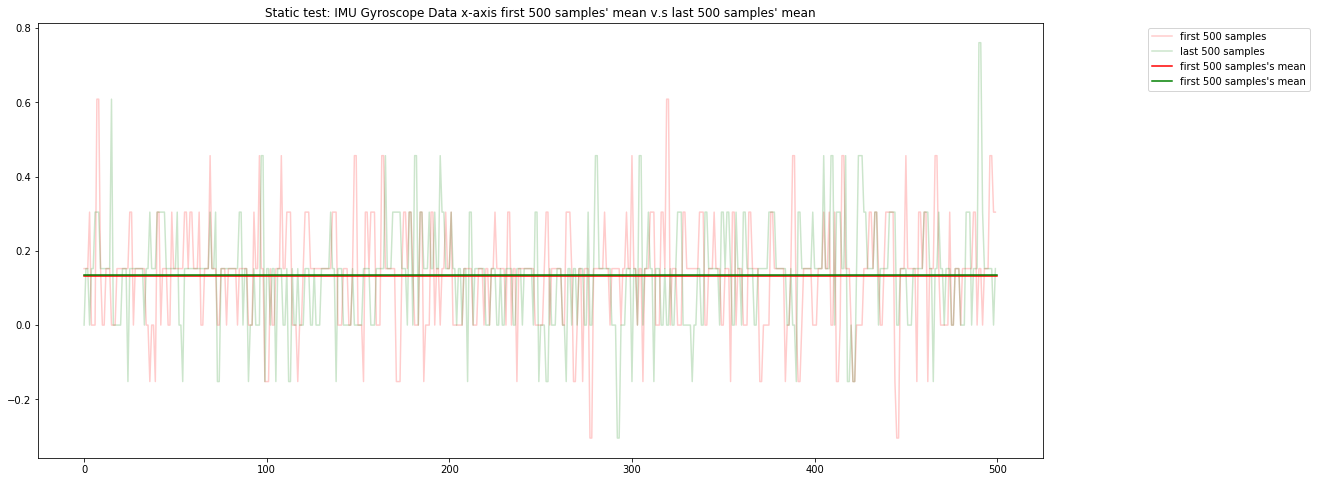

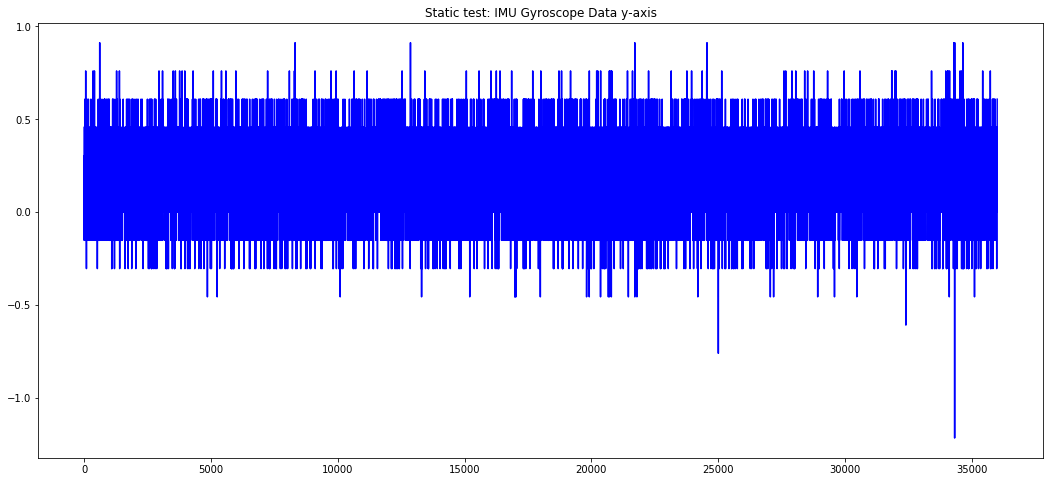

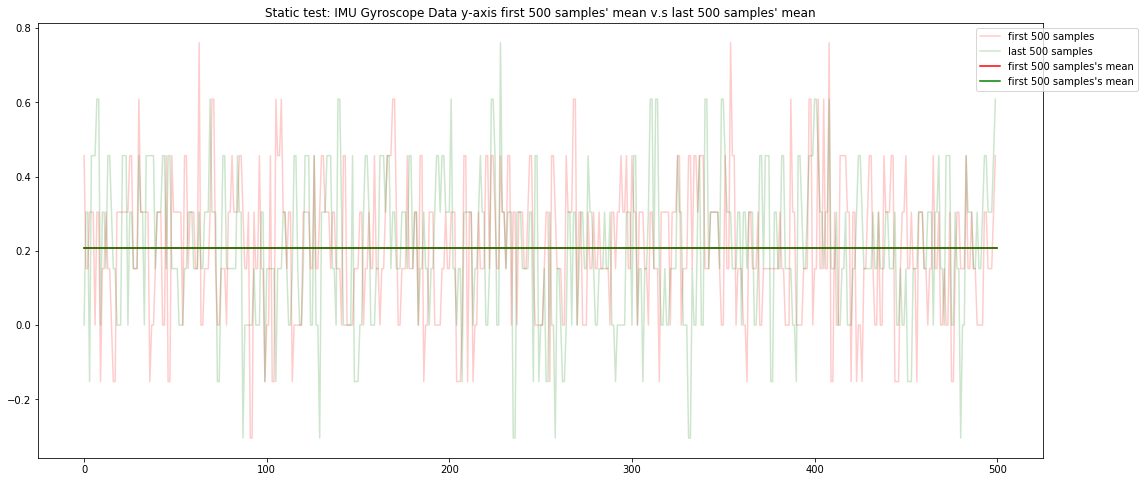

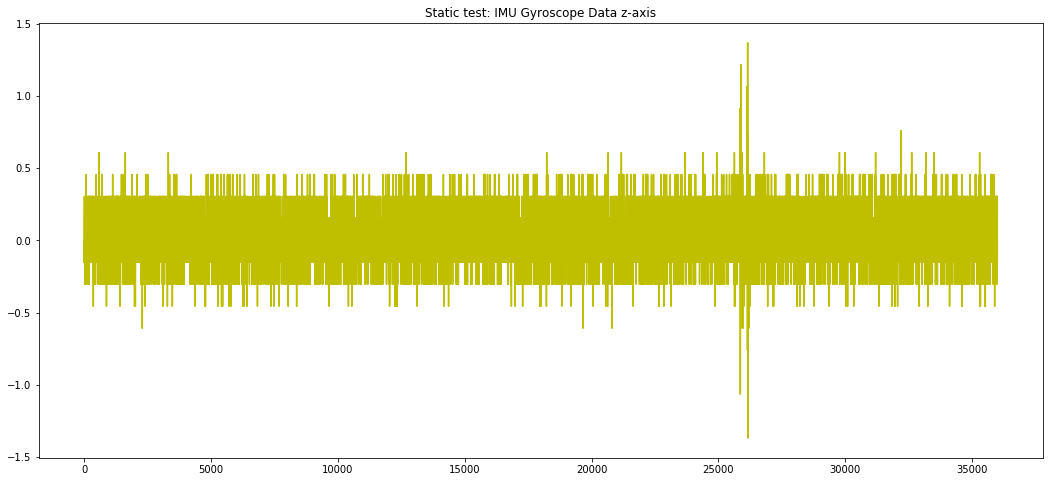

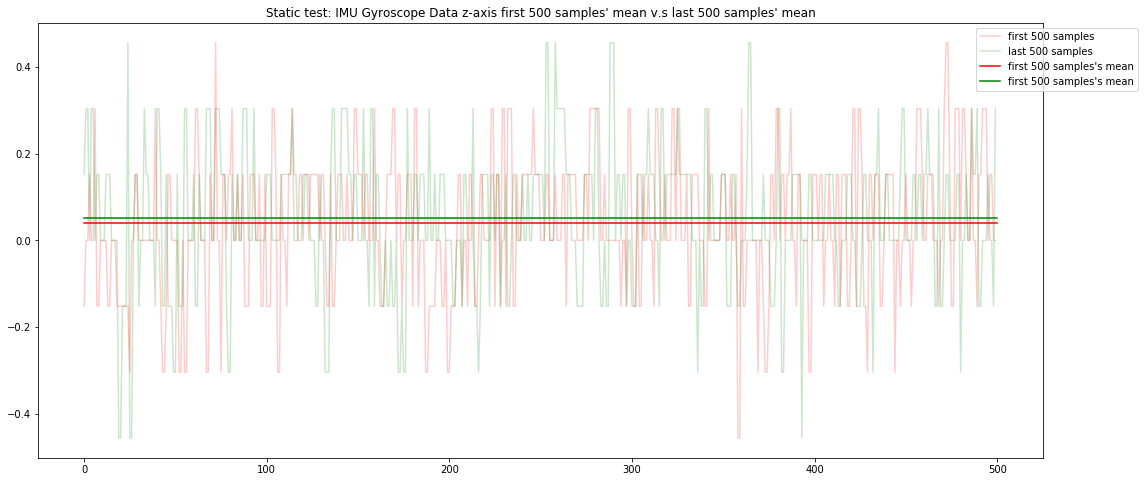

In [4]:
opacity = 0.2

plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data x-axis")
plt.plot(static_data[:,3] ,c='m')
plt.show()


plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data x-axis first 500 samples' mean v.s last 500 samples' mean")
first = static_data[:500,3]
last = static_data[35500:,3]
first_mean = np.mean(first, axis = 0)
last_mean = np.mean(last, axis = 0)
plt.plot(first, label = 'first 500 samples', c='r', alpha = opacity)
plt.plot(last, label = 'last 500 samples', c='g', alpha = opacity)
plt.plot([0, 500], [first_mean, first_mean], c = 'r', label = "first 500 samples's mean")
plt.plot([0, 500], [last_mean, last_mean], c = 'g', label = "first 500 samples's mean")
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()


plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data y-axis")
plt.plot(static_data[:,4], label='gyro y', c='b')
plt.show()


plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data y-axis first 500 samples' mean v.s last 500 samples' mean")
first = static_data[:500,4]
last = static_data[35500:,4]
first_mean = np.mean(first, axis = 0)
last_mean = np.mean(last, axis = 0)
plt.plot(first, label = 'first 500 samples', c='r', alpha = opacity)
plt.plot(last, label = 'last 500 samples', c='g', alpha = opacity)
plt.plot([0, 500], [first_mean, first_mean], c = 'r', label = "first 500 samples's mean")
plt.plot([0, 500], [last_mean, last_mean], c = 'g', label = "first 500 samples's mean")
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data z-axis")
plt.plot(static_data[:,5], label='gyro z', c='y')
plt.show()

plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data z-axis first 500 samples' mean v.s last 500 samples' mean")
first = static_data[:500,5]
last = static_data[35500:,5]
first_mean = np.mean(first, axis = 0)
last_mean = np.mean(last, axis = 0)
plt.plot(first, label = 'first 500 samples', c='r', alpha = opacity)
plt.plot(last, label = 'last 500 samples', c='g', alpha = opacity)
plt.plot([0, 500], [first_mean, first_mean], c = 'r', label = "first 500 samples's mean")
plt.plot([0, 500], [last_mean, last_mean], c = 'g', label = "first 500 samples's mean")
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()


In [5]:
def get_x_y_pts(data, intervals):
    results = []
    for i in intervals:
        y_pt = np.mean(data[i[0]: i[1]], axis = 0)
        results.append([[i[0],i[1]],[y_pt,y_pt]])
    return results

In [6]:
intervals = [[0, 5500],[7500, 11500],[14000, 17500],[20000, 24000],[27500, 35000]]

## Visualization for dynamic data

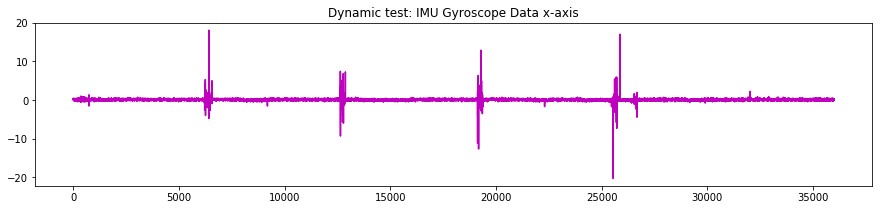

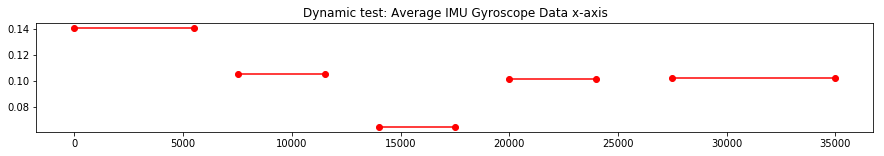

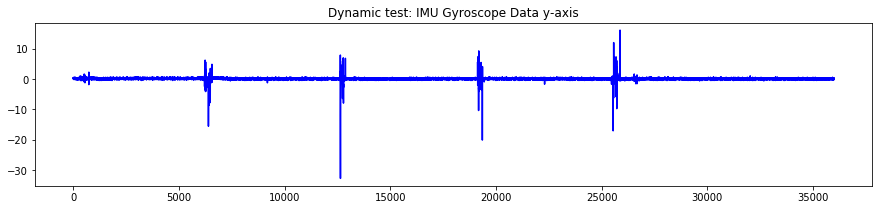

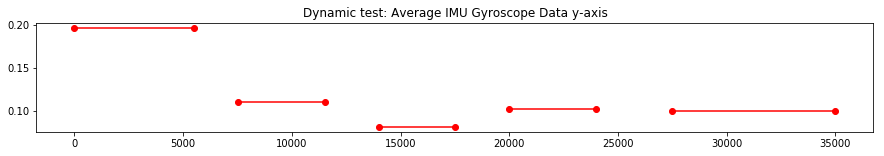

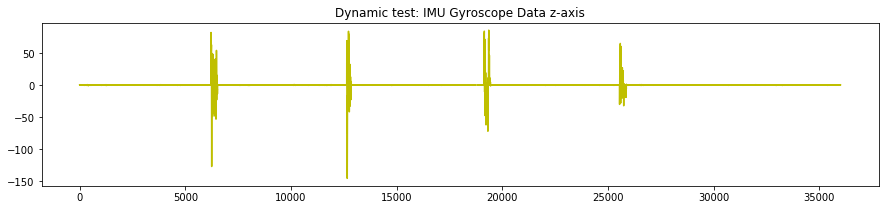

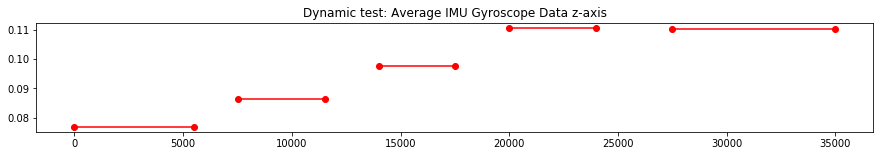

In [7]:
plt.figure(figsize=(15,3))
plt.title("Dynamic test: IMU Gyroscope Data x-axis")
plt.plot(dynamic_data[:,3] ,c='m')
plt.show()

plt.figure(figsize=(15,2))
plt.title("Dynamic test: Average IMU Gyroscope Data x-axis")
pts = get_x_y_pts(dynamic_data[:,3],intervals)
for p in pts: 
    plt.plot(p[0], p[1], c = 'r', marker = 'o')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Dynamic test: IMU Gyroscope Data y-axis")
plt.plot(dynamic_data[:,4], label='gyro y', c='b')
plt.show()


plt.figure(figsize=(15,2))
plt.title("Dynamic test: Average IMU Gyroscope Data y-axis")
pts = get_x_y_pts(dynamic_data[:,4],intervals)
for p in pts: 
    plt.plot(p[0], p[1], c = 'r', marker = 'o')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Dynamic test: IMU Gyroscope Data z-axis")
plt.plot(dynamic_data[:,5], label='gyro z', c='y')
plt.show()

plt.figure(figsize=(15,2))
plt.title("Dynamic test: Average IMU Gyroscope Data z-axis")
pts = get_x_y_pts(dynamic_data[:,5],intervals)
for p in pts: 
    plt.plot(p[0], p[1], c = 'r', marker = 'o')
plt.show()


In [8]:
def calibrate(input_data):
    # Ideal accelerometer calibration parameters
    acc_calibration_params = np.array([2.29299485e-03, 9.73357832e-04, 2.18891523e-03,
                                       9.97372417e-01, 9.98078141e-01, 9.95206414e-01,
                                       -8.12765191e-03, -1.24052008e-02, -1.41327621e-02])
    # Ideal gyro calibration parameters
    gyro_calibration_params = np.array([0.00844165, 0.00196508, -0.00410652,
                                       -0.01548789, -0.00191488, -0.00770839,
                                       0.40658698, 0.40275294, 0.40165824])
    
    Ta = np.array([[1, -acc_calibration_params[0], acc_calibration_params[1]],
                   [0, 1, -acc_calibration_params[2]],
                   [0, 0, 1]])
    
    Tg = np.array([[1, -gyro_calibration_params[0], gyro_calibration_params[1]],
                   [gyro_calibration_params[2], 1, -gyro_calibration_params[3]],
                   [-gyro_calibration_params[4], gyro_calibration_params[5], 1]])
    
    Ka = np.array([[acc_calibration_params[3], 0, 0],
                   [0, acc_calibration_params[4], 0],
                   [0, 0, acc_calibration_params[5]]])
    
    Kg = np.array([[gyro_calibration_params[6], 0, 0],
                   [0, gyro_calibration_params[7], 0],
                   [0, 0, gyro_calibration_params[8]]])

    ba = acc_calibration_params[6:9]
#     ba = acc_bias
    bg = np.array([0.12964524, 0.15079131, 0.08211978])
    
    output_data = np.empty((input_data.shape[0], 6))
    output_data[:,0:3] = (Ta@Ka@(input_data[:,0:3] + ba).T).T
#     output_data[:,3:6] = (Tg@Kg@(input_data[:,3:6] + bg).T).T
    
    return output_data

def base_rotation(mean_acc_while_stationary):
    """ https://math.stackexchange.com/questions/180418/calculate-rotation-matrix-to-align-vector-a-to-vector-b-in-3d """
    a = mean_acc_while_stationary
    b = np.array([0, 0, 1])
    v = np.cross(a, b)
    c = np.dot(a, b)
    v_x = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    R = np.eye(3) + v_x + (v_x@v_x)*(1/(1+c))
    return R

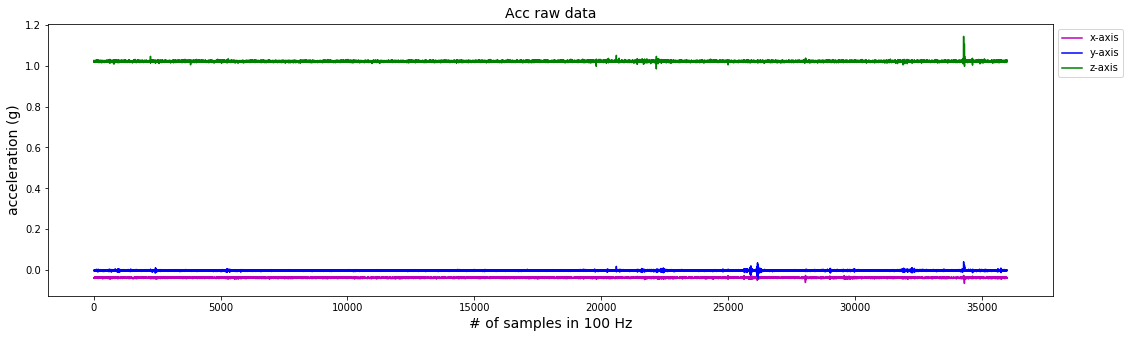

In [9]:
plt.figure(figsize=(18,5))
plt.title("Acc raw data", fontsize = 14)
plt.xlabel("# of samples in 100 Hz", fontsize = 14)
plt.ylabel("acceleration (g)", fontsize = 14)
plt.plot(static_data[:,0] ,c='m', label = "x-axis")
plt.plot(static_data[:,1] ,c='b', label = "y-axis")
plt.plot(static_data[:,2] ,c='g', label = "z-axis")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

calibrated_dynamic_data = calibrate(dynamic_data)
calibrated_static_data = calibrate(static_data)

calibrated_static_mean = np.mean(calibrated_static_data[:,:3], axis = 0)
unit_static_mean = calibrated_static_mean /  np.linalg.norm(calibrated_static_mean)

R = base_rotation(unit_static_mean)
final_static_data = np.array((R @ calibrated_static_data[:,:3].T).T)

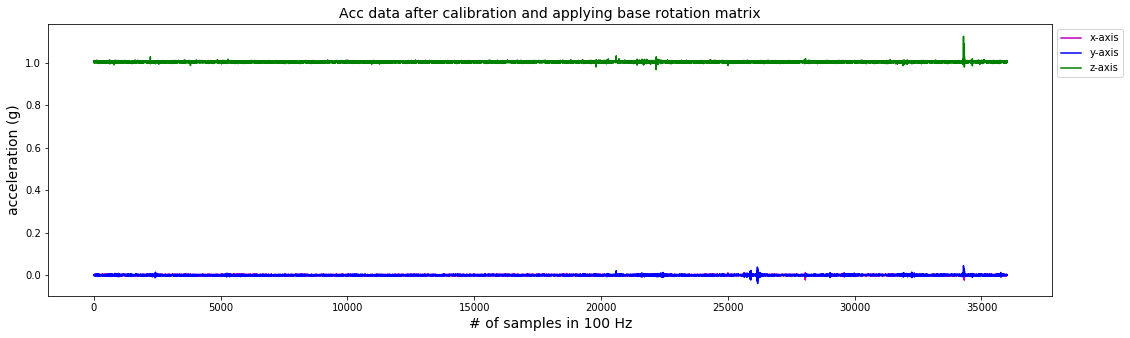

acc mean on each axis: [ -3.49492040e-16   2.69229083e-18   1.00356223e+00]
Norm of the calibrated acc mean data: 1.00356222704


In [10]:
plt.figure(figsize=(18,5))
plt.title("Acc data after calibration and applying base rotation matrix", fontsize = 14)
plt.xlabel("# of samples in 100 Hz", fontsize = 14)
plt.ylabel("acceleration (g)", fontsize = 14)
plt.plot(final_static_data[:,0] ,c='m', label = "x-axis")
plt.plot(final_static_data[:,1] ,c='b', label = "y-axis")
plt.plot(final_static_data[:,2] ,c='g', label = "z-axis")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

final_static_mean = np.mean(final_static_data[:,:3], axis = 0)
print("acc mean on each axis:", final_static_mean)
print("Norm of the calibrated acc mean data:",np.linalg.norm(final_static_mean))

In [11]:
def integrate_sth(data, dt, convertion_factor):
    result = [0]
    v_i = 0
    for i in range(len(data)):
        if i == 0:
            a = data[i] / 2
        else:  
            a = data[i] / 2 + data[i - 1] / 2
        v_f = a * dt * convertion_factor + v_i
        result.append(v_f)
        v_i = v_f
    return result

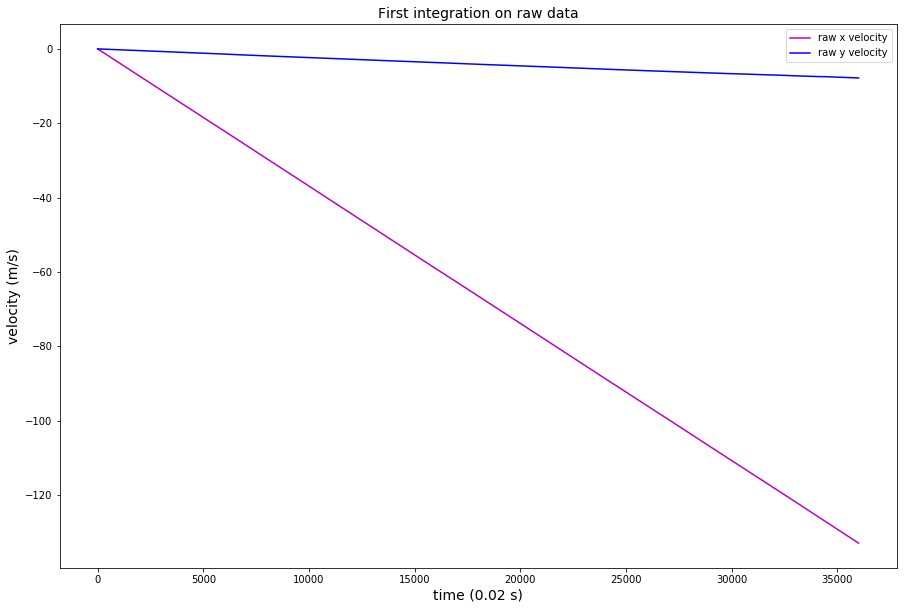

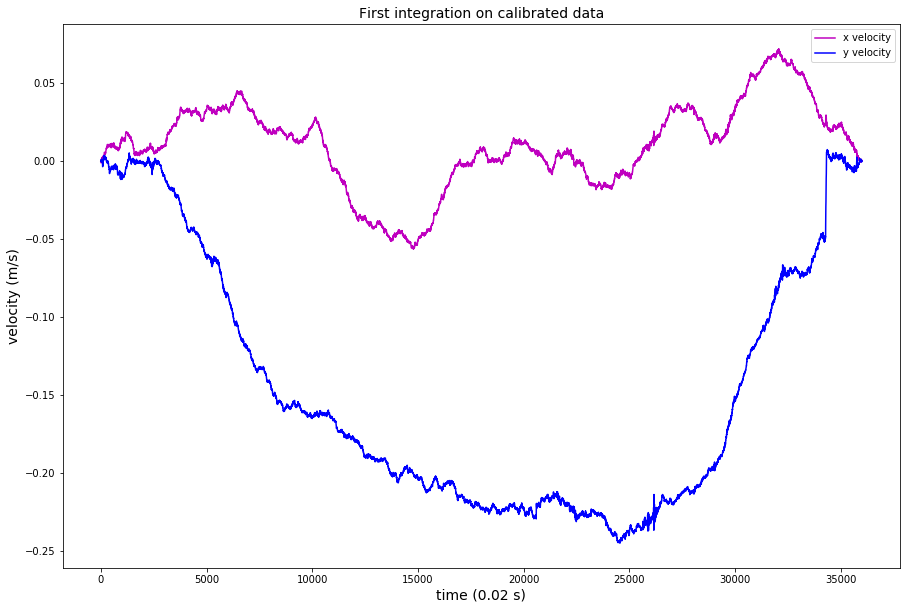

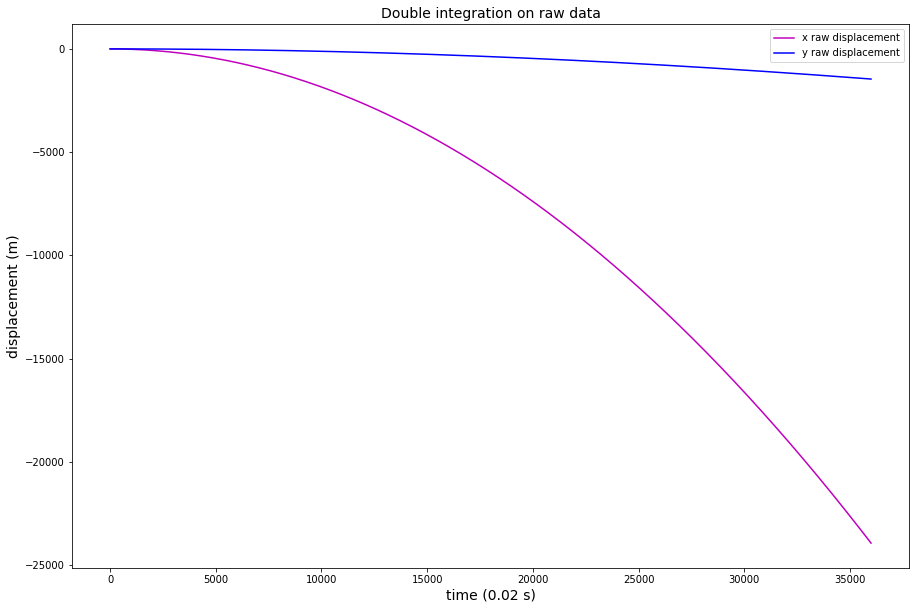

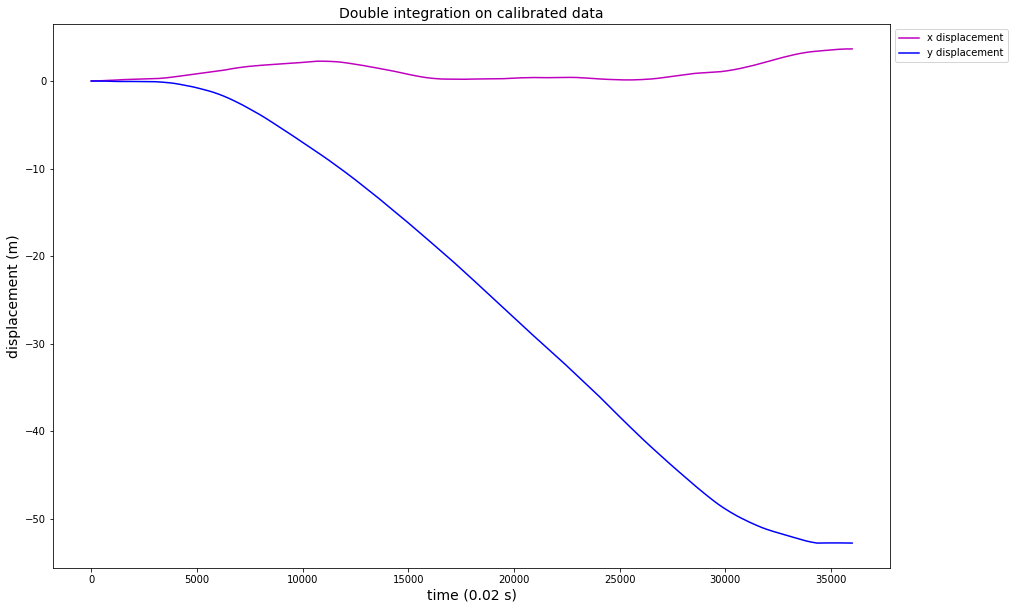

In [13]:

x_raw_velocity = integrate_sth(static_data[:,0], 0.01, 9.8)
y_raw_velocity = integrate_sth(static_data[:,1], 0.01, 9.8)
x_velocity = integrate_sth(final_static_data[:,0], 0.01, 9.8)
y_velocity = integrate_sth(final_static_data[:,1], 0.01, 9.8)

plt.figure(figsize=(15,10))
plt.title("First integration on raw data", fontsize = 14)
plt.xlabel("time (0.02 s)", fontsize = 14)
plt.ylabel("velocity (m/s)", fontsize = 14)
plt.plot(x_raw_velocity, c = 'm', label = "raw x velocity")
plt.plot(y_raw_velocity, c = 'b', label = "raw y velocity")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(15,10))
plt.title("First integration on calibrated data", fontsize = 14)
plt.xlabel("time (0.02 s)", fontsize = 14)
plt.ylabel("velocity (m/s)", fontsize = 14)
plt.plot(x_velocity, c = 'm', label = "x velocity")
plt.plot(y_velocity, c = 'b', label = "y velocity")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

x_displacement = integrate_sth(x_velocity, 0.01, 1)
y_displacement = integrate_sth(y_velocity, 0.01, 1)
x_raw_displacement = integrate_sth(x_raw_velocity, 0.01, 1)
y_raw_displacement = integrate_sth(y_raw_velocity, 0.01, 1)

plt.figure(figsize=(15,10))
plt.title("Double integration on raw data", fontsize = 14)
plt.xlabel("time (0.02 s)", fontsize = 14)
plt.ylabel("displacement (m)", fontsize = 14)
plt.plot(x_raw_displacement, c = 'm', label = "x raw displacement")
plt.plot(y_raw_displacement, c = 'b', label = "y raw displacement")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(15,10))
plt.title("Double integration on calibrated data", fontsize = 14)
plt.xlabel("time (0.02 s)", fontsize = 14)
plt.ylabel("displacement (m)", fontsize = 14)
plt.plot(x_displacement, c = 'm', label = "x displacement")
plt.plot(y_displacement, c = 'b', label = "y displacement")
plt.legend(bbox_to_anchor=(1,1))
plt.show()